# Loading modules

In [72]:
import numpy as np
import scipy as sp
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
import glob
import bbknn

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100)
sc.logging.print_version_and_date()

Running Scanpy 1.2.2 on 2018-07-20 13:46.


# Load dataset

The object can be downloaded from [ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/PBMC.merged.h5ad](ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/PBMC.merged.h5ad)

In [73]:
adata = sc.read("PBMC.merged")

## Conventional KNN

In [74]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:15.84) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [75]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:15.51) --> added
    'X_umap', UMAP coordinates (adata.obsm)


saving figure to file ./figures/umapFig2A_Method.pdf


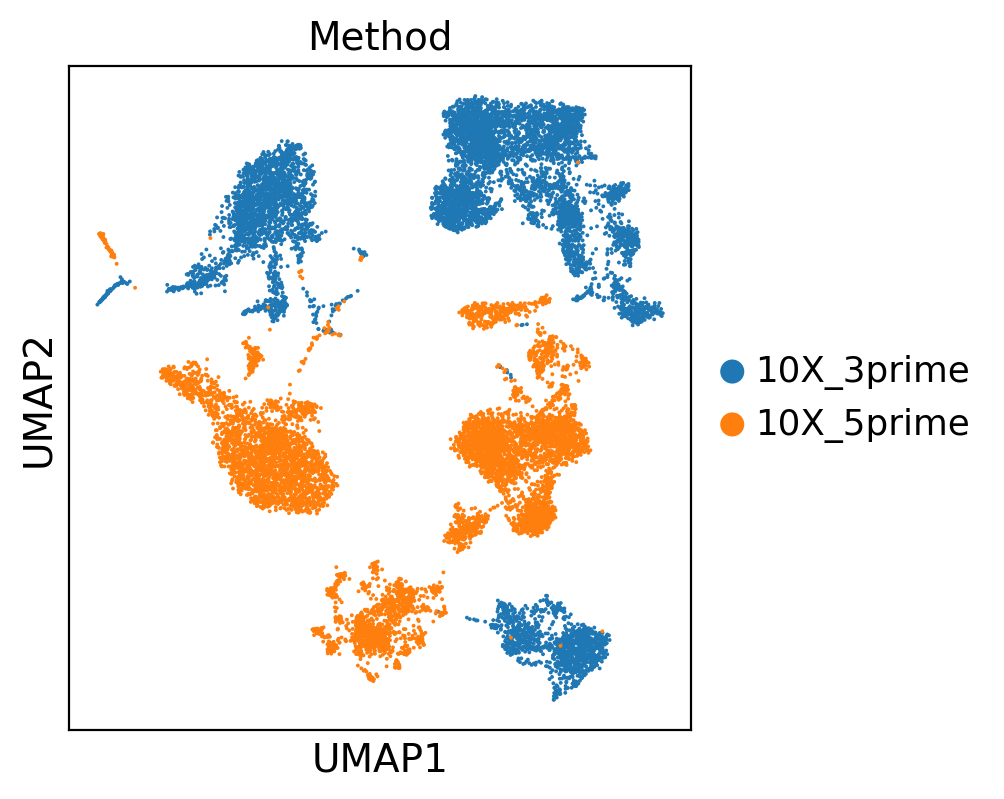

In [76]:
sc.pl.umap(adata,color='Method',save = "Fig2A_Method")

saving figure to file ./figures/umapFig2A_Celltype.pdf


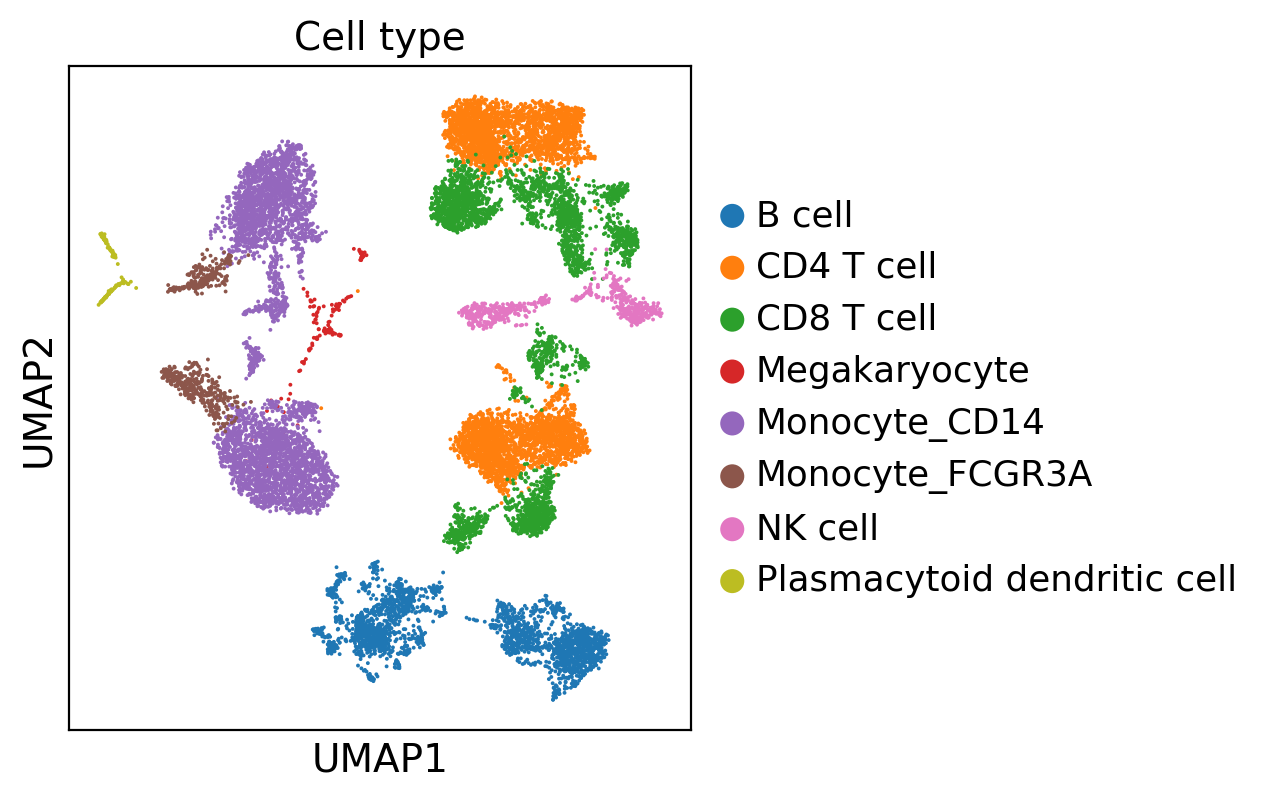

In [77]:
sc.pl.umap(adata,color='Cell type', save = "Fig2A_Celltype")

## Run bbknn

In [78]:
bdata = bbknn.bbknn(adata,batch_key='Sample',trim=200,copy=True)

computing batch balanced neighbors
    finished (0:00:13.27) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [79]:
sc.tl.umap(bdata)

computing UMAP
    finished (0:00:12.31) --> added
    'X_umap', UMAP coordinates (adata.obsm)


saving figure to file ./figures/umapFig2B_Method.pdf


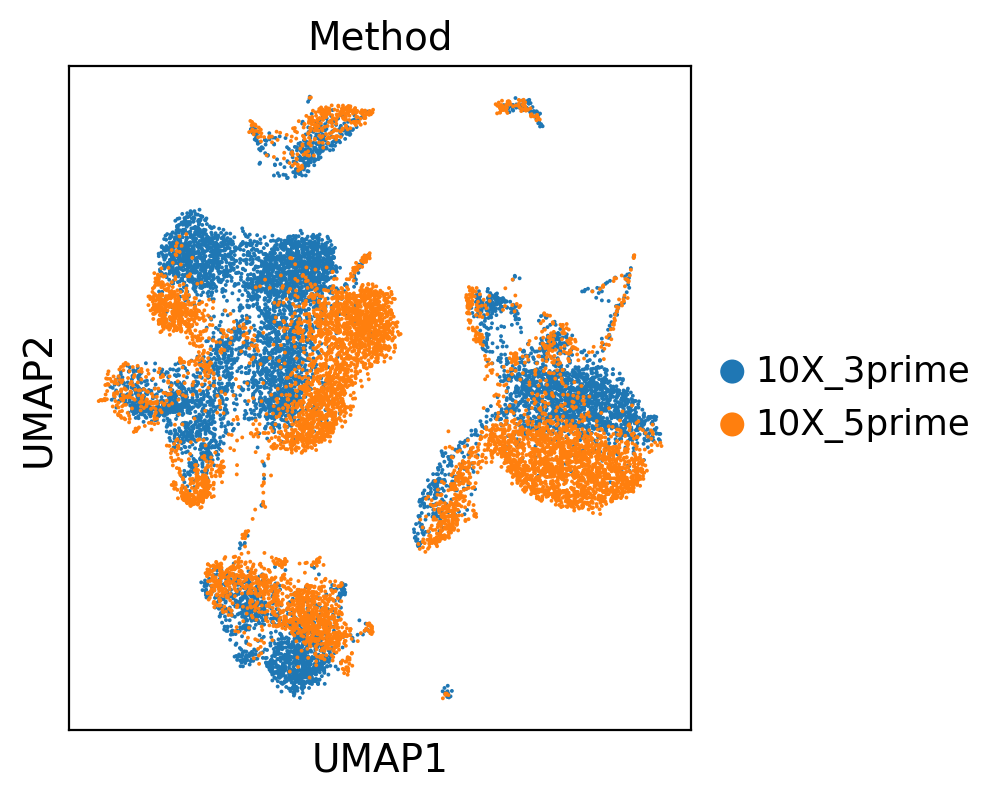

In [80]:
sc.pl.umap(bdata,color='Method',save="Fig2B_Method")

saving figure to file ./figures/umapFig2B_Cell type.pdf


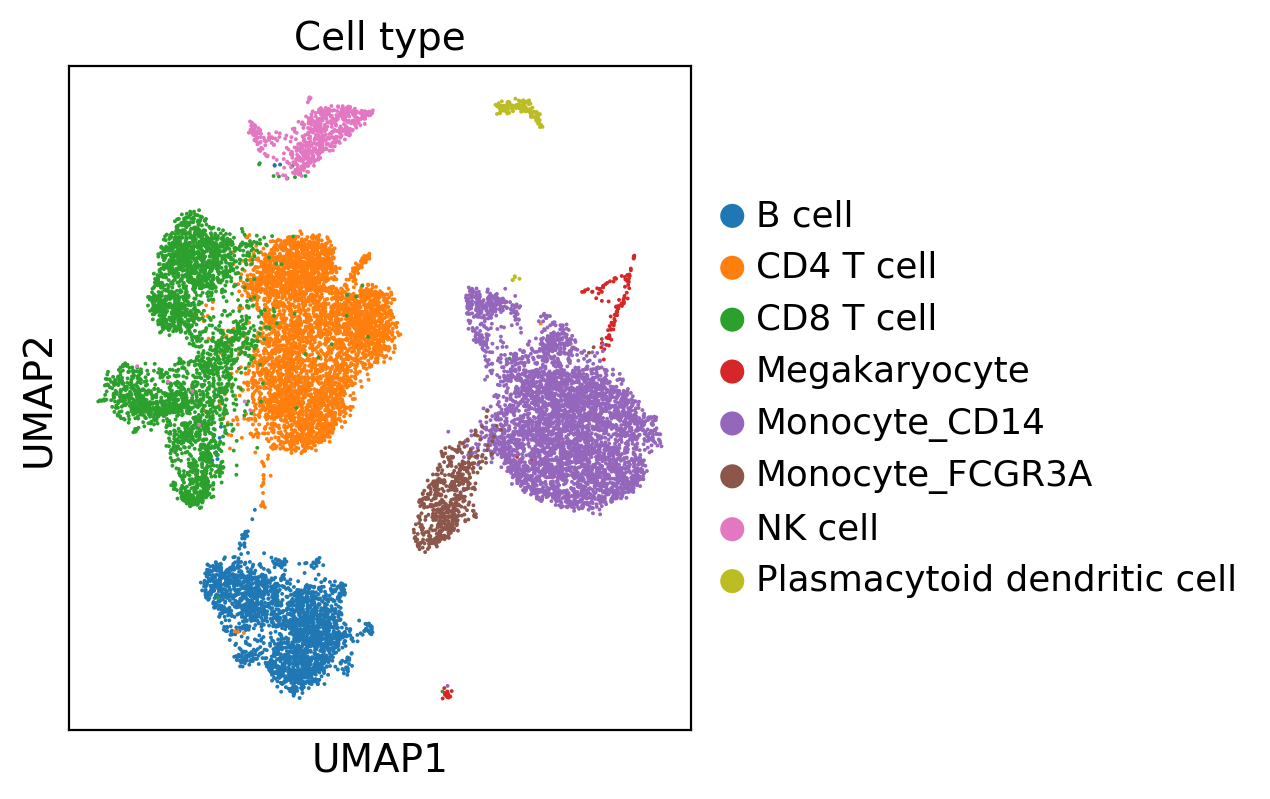

In [81]:
sc.pl.umap(bdata,color='Cell type',save="Fig2B_Cell type")

Canonical marker genes used when proposing the cell type annotation displayed above.

saving figure to file ./figures/umapFig2C_CD3G.pdf


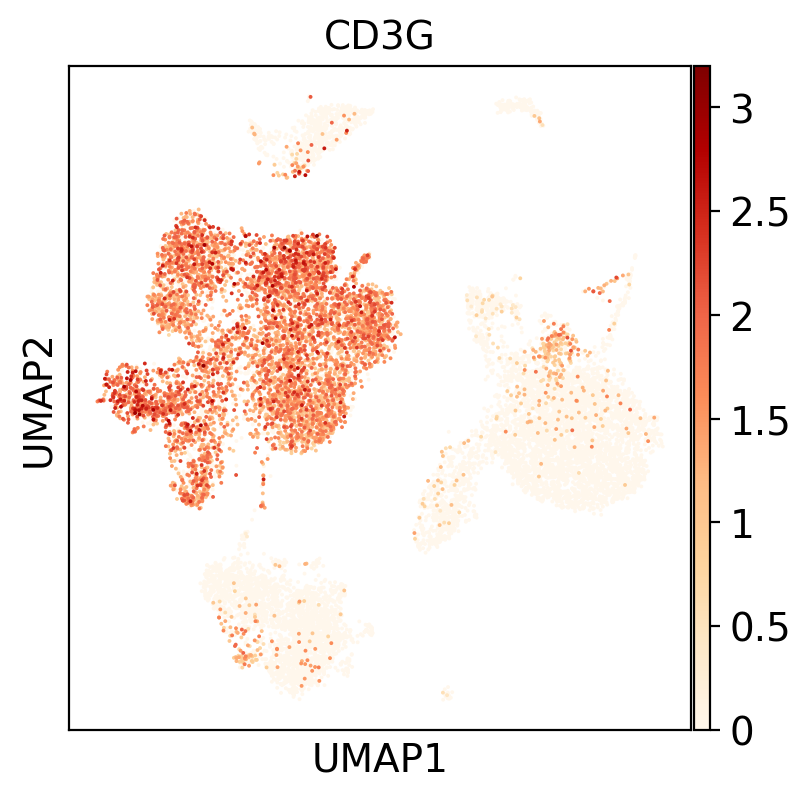

saving figure to file ./figures/umapFig2C_CD19.pdf


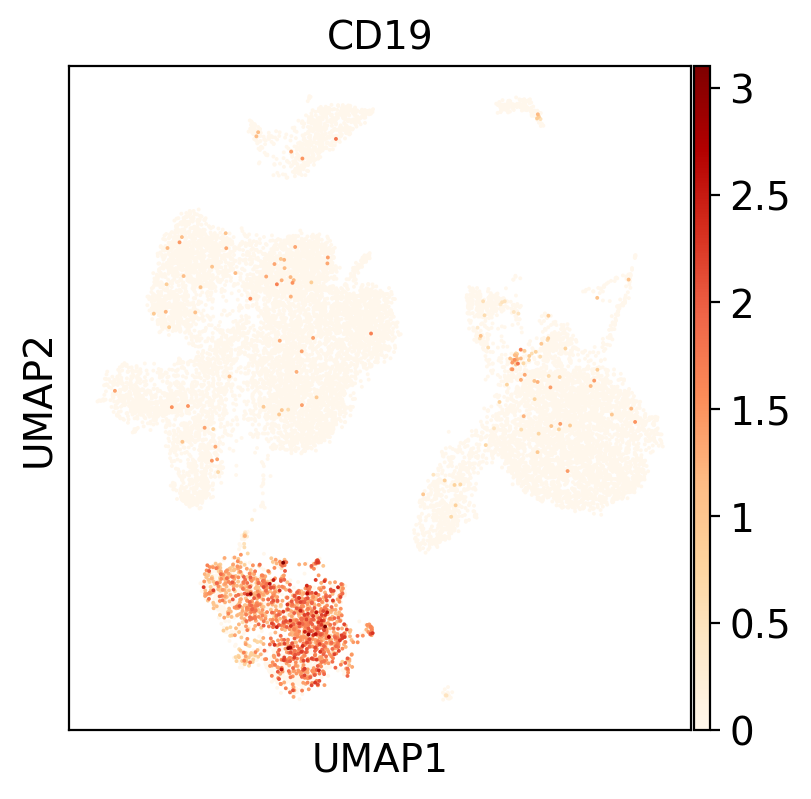

saving figure to file ./figures/umapFig2C_CD68.pdf


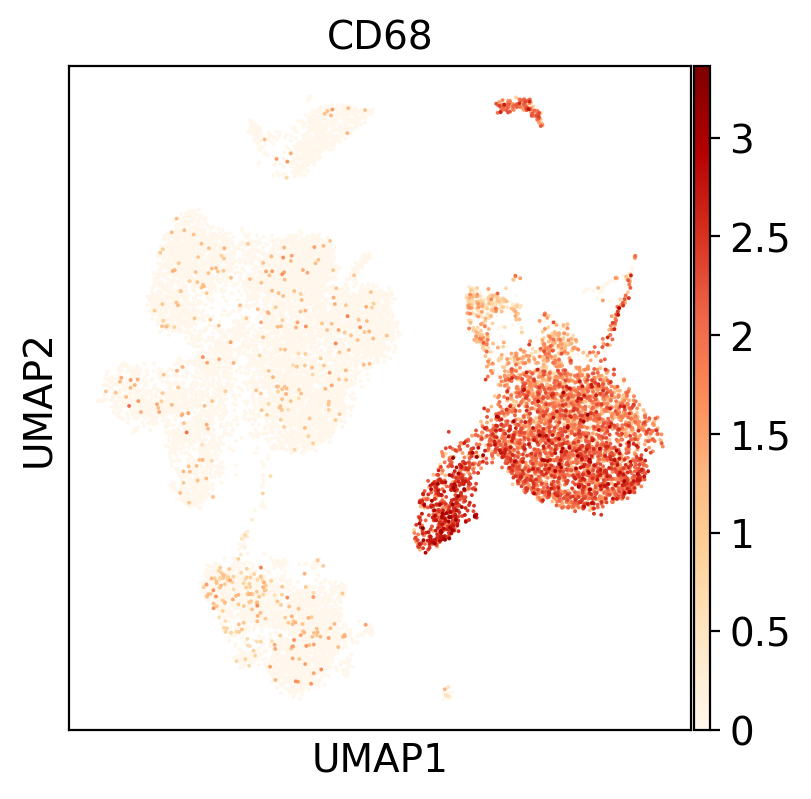

saving figure to file ./figures/umapFig2C_NKG7.pdf


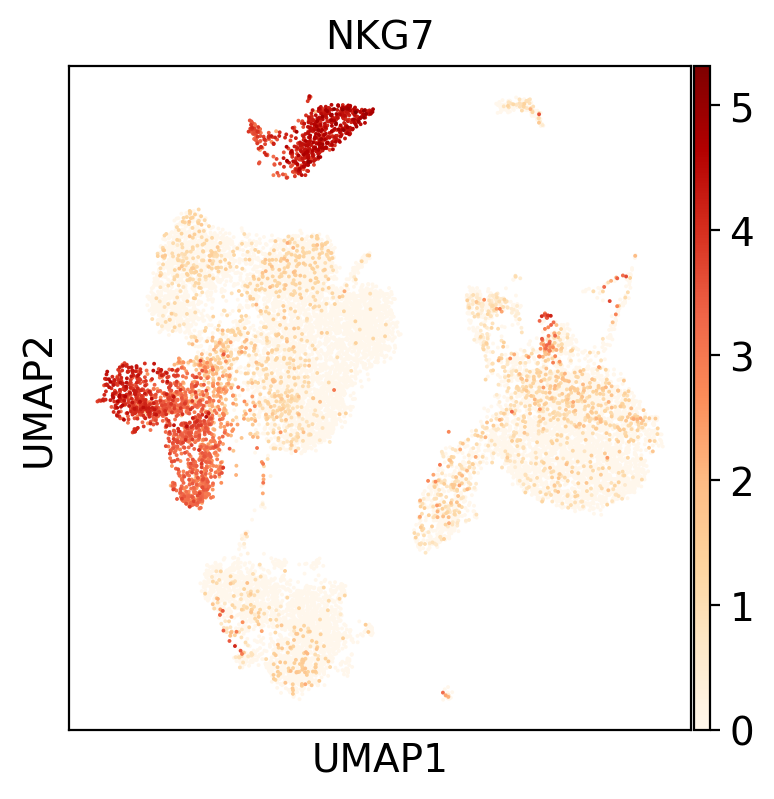

saving figure to file ./figures/umapFig2C_KLRF1.pdf


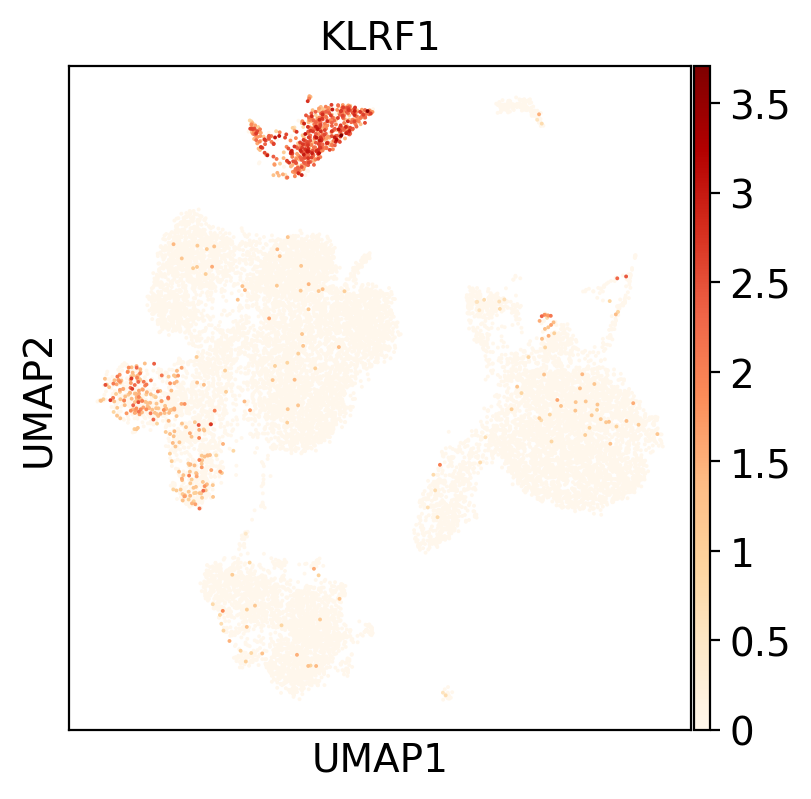

saving figure to file ./figures/umapFig2C_TYROBP.pdf


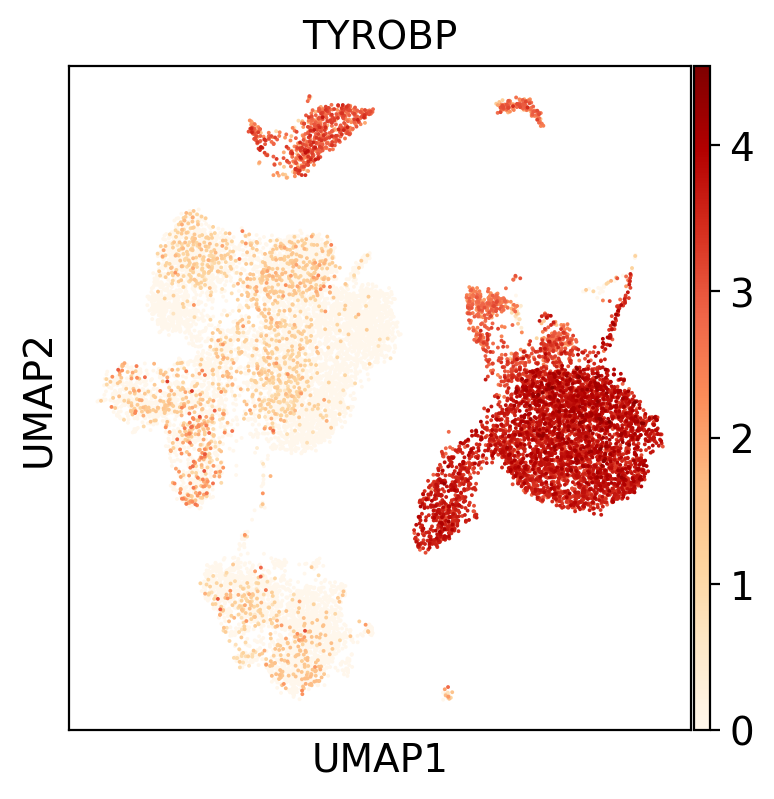

saving figure to file ./figures/umapFig2C_CD14.pdf


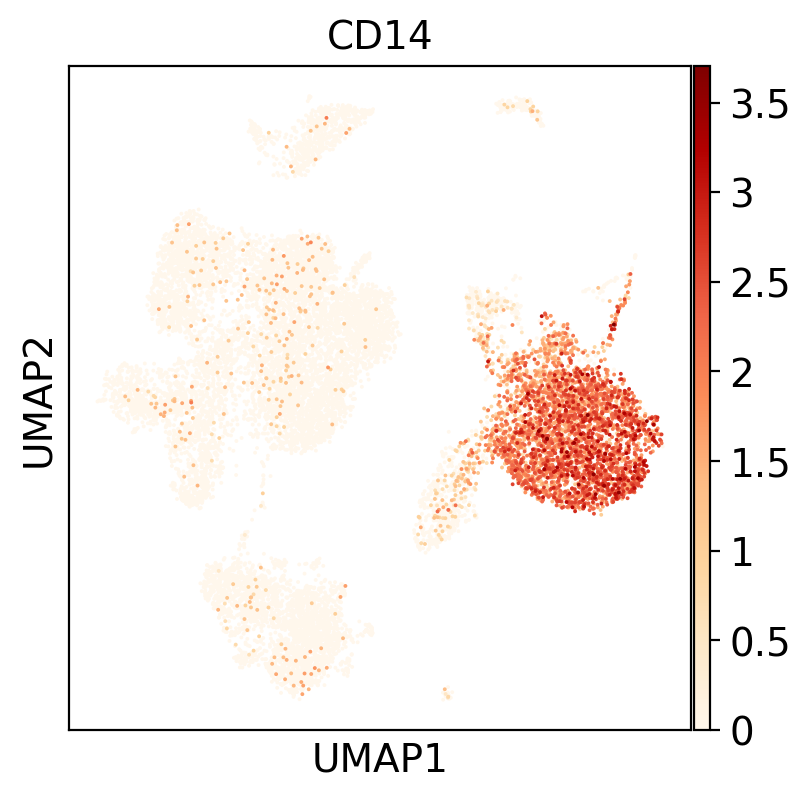

saving figure to file ./figures/umapFig2C_FCGR3A.pdf


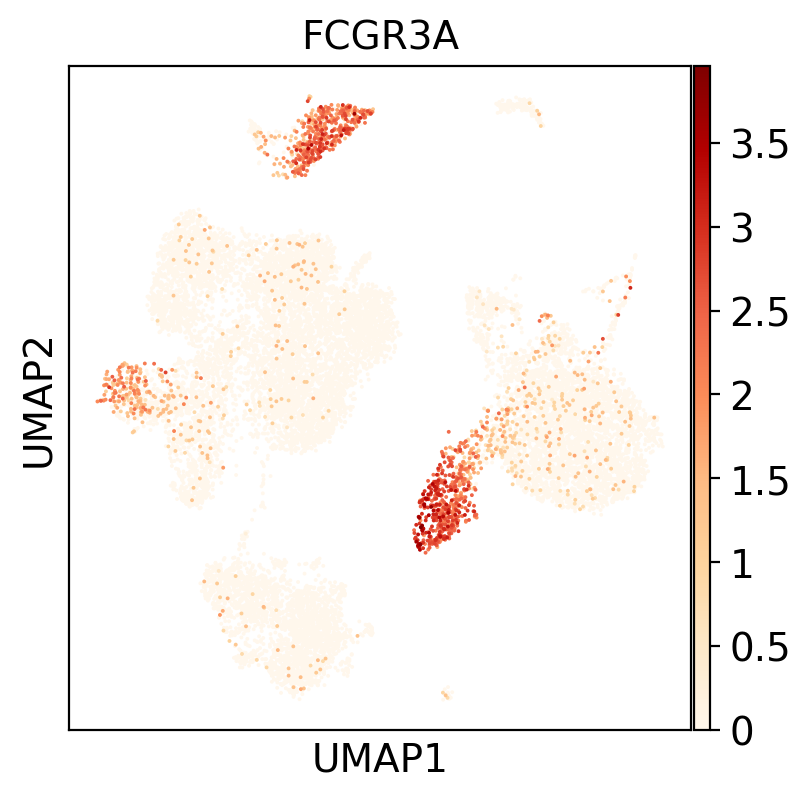

saving figure to file ./figures/umapFig2C_ITGA2B.pdf


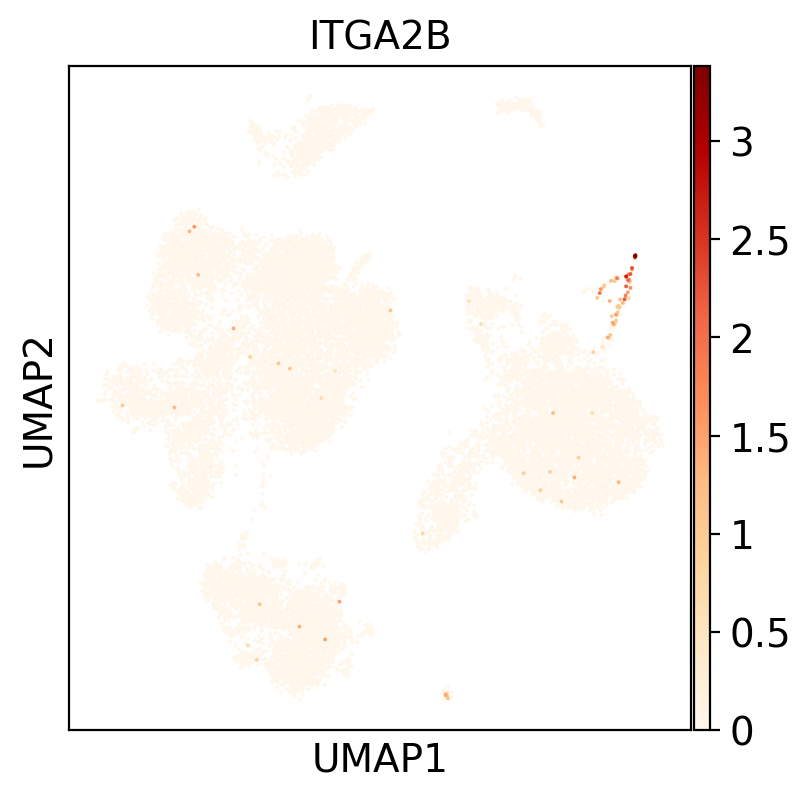

saving figure to file ./figures/umapFig2C_IRF8.pdf


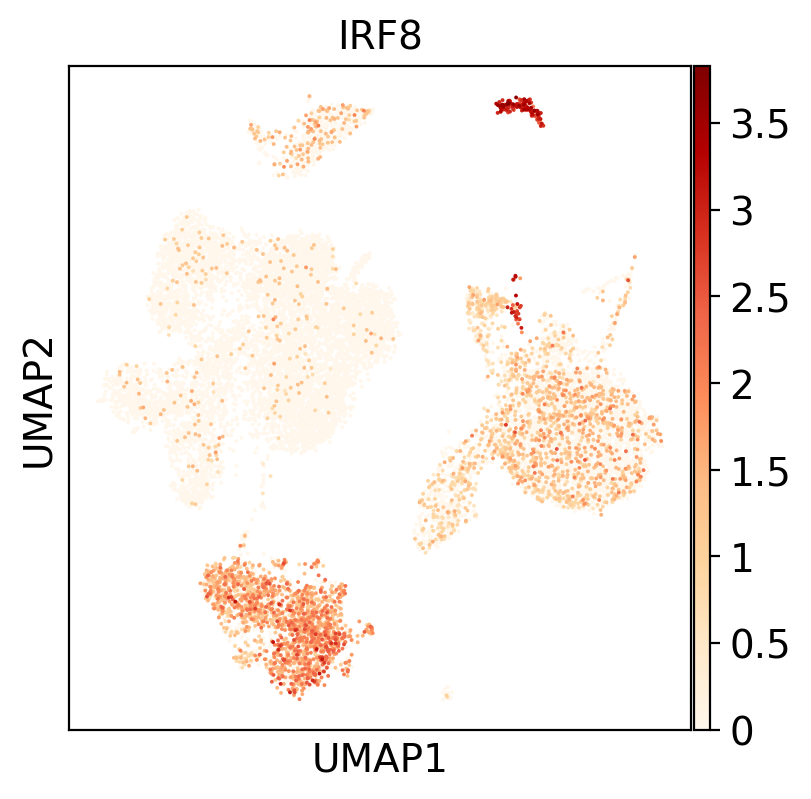

saving figure to file ./figures/umapFig2C_CD34.pdf


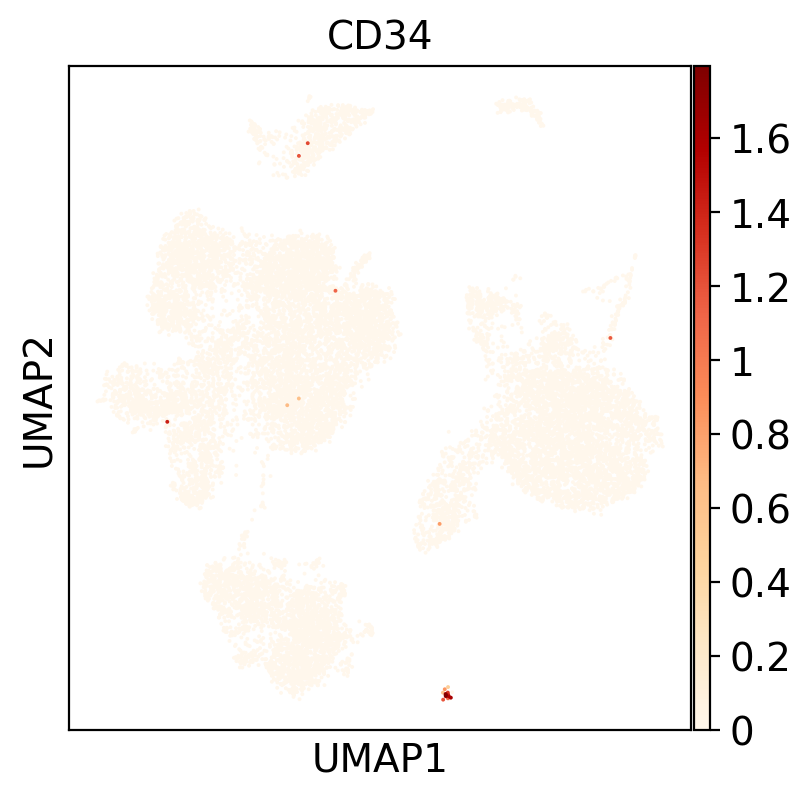

In [82]:
for gene in ["CD3G","CD19","CD68","NKG7","KLRF1","TYROBP","CD14","FCGR3A","ITGA2B","IRF8","CD34"]:
    sc.pl.umap(bdata,color=gene,save="Fig2C_%s"%(gene), color_map='OrRd')

Check expression of TCR constant and variable genes

In [83]:
bdata.obs['TRAV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("TRAV")].X.todense(),axis=1).A1

In [84]:
bdata.obs['TRBV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("TRBV")].X.todense(),axis=1).A1

In [85]:
bdata.obs['IGHV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("IGHV")].X.todense(),axis=1).A1

saving figure to file ./figures/umapFig2D_TRAC.pdf


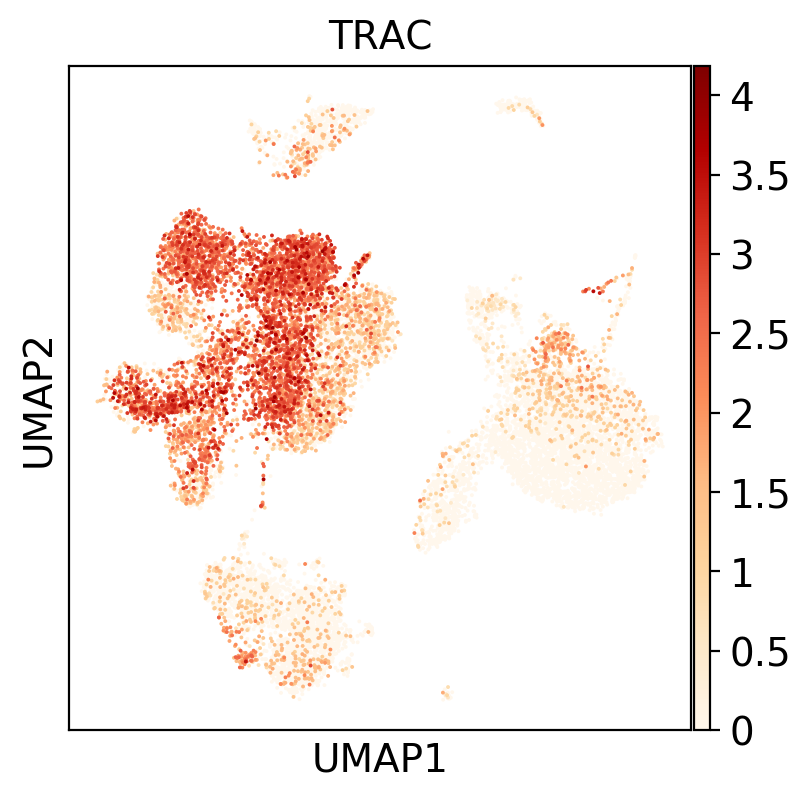

saving figure to file ./figures/umapFig2D_TRBV.pdf


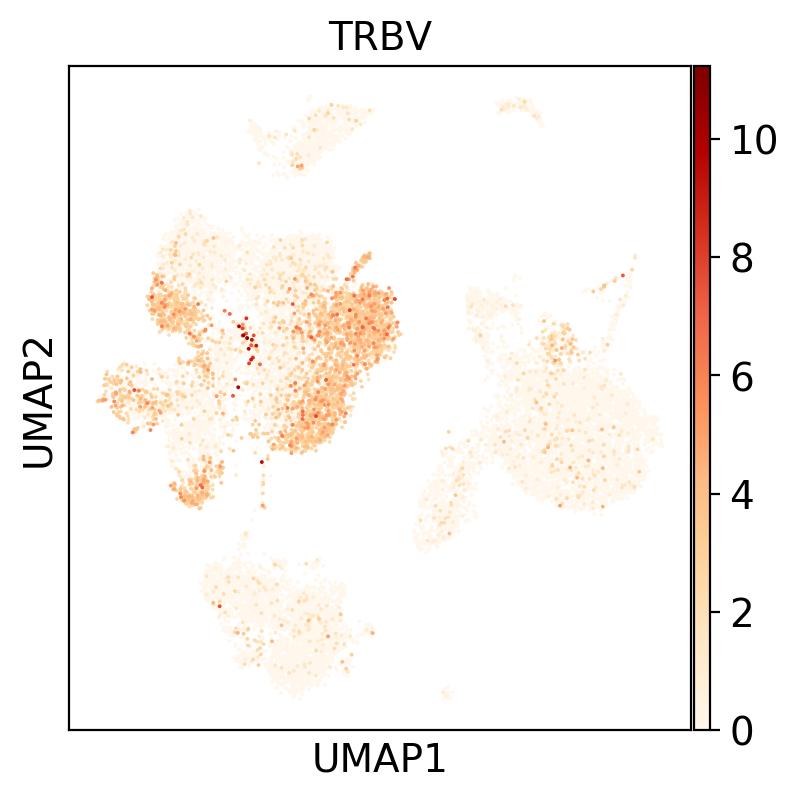

saving figure to file ./figures/umapFig2D_TRAV.pdf


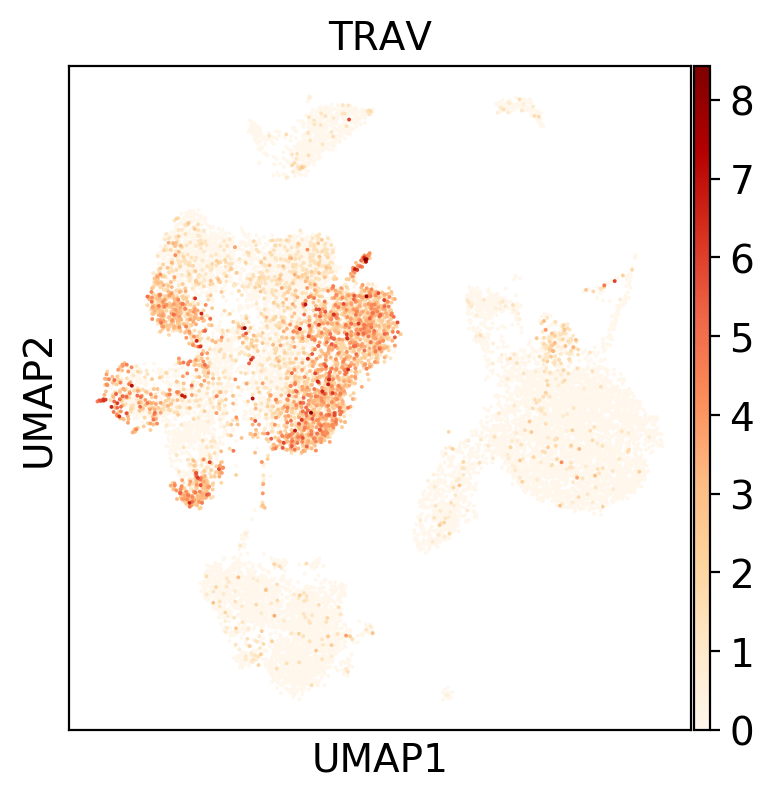

saving figure to file ./figures/umapFig2D_IGHV.pdf


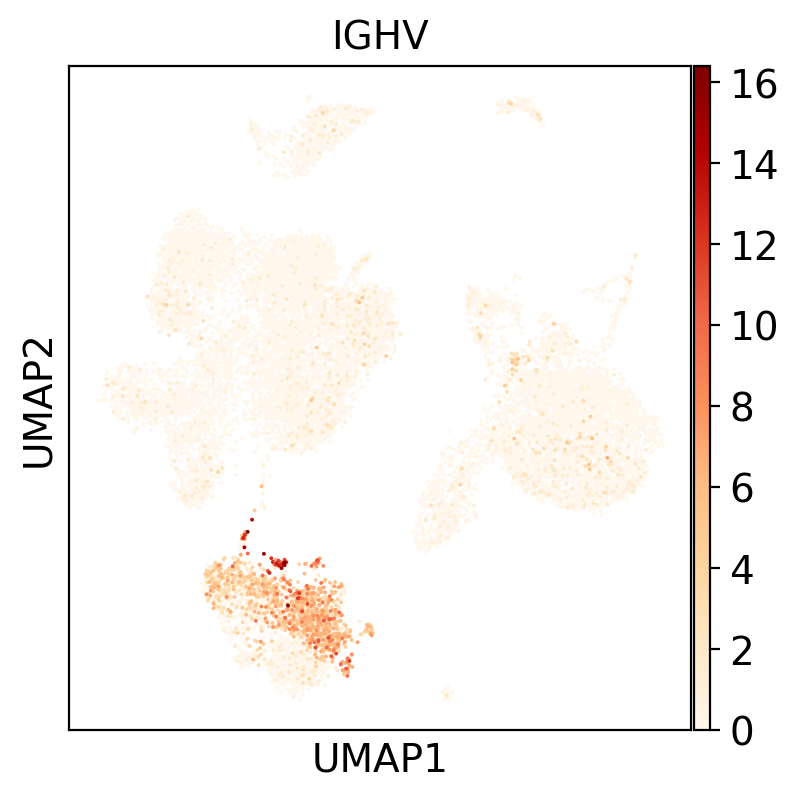

In [86]:
for gene in ["TRAC","TRBV","TRAV","IGHV"]:
    sc.pl.umap(bdata,color=gene,save="Fig2D_%s"%(gene), color_map='OrRd')